In [1]:
import pandas as pd
import numpy as np

In [ ]:
path = '../../data/gtd.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')
print("Original DataFrame size:", len(df))
df = df.loc[(df['iyear'] != 0) & (df['imonth'] != 0) & (df['iday'] != 0)]
df = df[(df["gname"] != 'Unknown')]
df = df[df['weaptype1_txt'] != 'Unknown']
print("Filtered DataFrame size:", len(df))


C:\Users\alexa\AppData\Local\Temp\ipykernel_2676\1349911382.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='ISO-8859-1')


Original DataFrame size: 181691
Filtered DataFrame size: 87500


In [30]:
partition2 = df[(df['iyear'] >= 1980) & (df['iyear'] <= 1995)]
partition2['attack_date'] = pd.to_datetime({'year': partition2['iyear'], 'month': partition2['imonth'], 'day': partition2['iday']})

groups = partition2.groupby(['iyear', 'gname']).size().reset_index(name='count')
top5 = groups.groupby('gname')['count'].sum().nlargest(4).index
top5
# Step 3: Filter the data to include only the top 10 groups
#filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

C:\Users\alexa\AppData\Local\Temp\ipykernel_2676\153811721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partition2['attack_date'] = pd.to_datetime({'year': partition2['iyear'], 'month': partition2['imonth'], 'day': partition2['iday']})


Index(['Shining Path (SL)', 'Farabundo Marti National Liberation Front (FMLN)',
       'Irish Republican Army (IRA)', 'Basque Fatherland and Freedom (ETA)'],
      dtype='object', name='gname')

In [9]:
partition2 = partition2[partition2['gname'].isin(top5)]

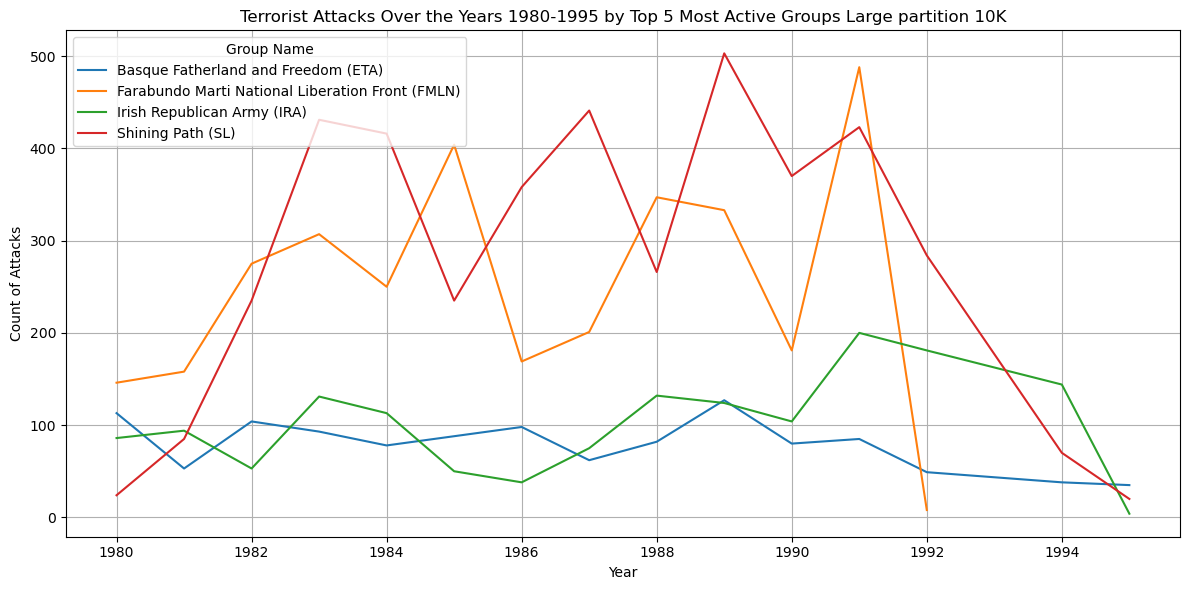

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = partition2.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Terrorist Attacks Over the Years 1980-1995 by Top 5 Most Active Groups Large partition 10K')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [24]:
def counts(dataframe):
    total = 0
    for gname in (top5):
        total += len(dataframe[dataframe['gname'] == gname])
        print(f'{gname}', len(dataframe[dataframe['gname'] == gname]))
    return total

total = counts(partition2)
print('Total before splitting: ', total)

Shining Path (SL) 4161
Farabundo Marti National Liberation Front (FMLN) 3267
Irish Republican Army (IRA) 1529
Basque Fatherland and Freedom (ETA) 1185
Total before splitting:  10142


# Train test splitting

In [15]:
train_size = int(0.7 * total)
print(partition2.iloc[train_size]['attack_date'])  # If train_size is an integer position

1989-09-05 00:00:00


In [17]:
partition2.sort_values(by='attack_date')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,attack_date
9915,198001010002,1980,1,1,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,PGIS,0,0,1,1,NaN,1980-01-01
9916,198001010003,1980,1,1,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,PGIS,0,0,1,1,NaN,1980-01-01
9917,198001010004,1980,1,1,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,PGIS,0,0,1,1,NaN,1980-01-01
9924,198001020004,1980,1,2,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,PGIS,0,0,1,1,NaN,1980-01-02
9934,198001030012,1980,1,3,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,CAIN,0,0,1,1,NaN,1980-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61065,199512080004,1995,12,8,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,CAIN,0,0,1,1,NaN,1995-12-08
61091,199512110005,1995,12,11,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,PGIS,0,1,0,1,NaN,1995-12-11
61147,199512160009,1995,12,16,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,PGIS,0,1,0,1,NaN,1995-12-16
61183,199512220001,1995,12,22,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,PGIS,0,1,0,1,NaN,1995-12-22


In [ ]:
train_date = '1989-09-05'
train_df = partition2[partition2['attack_date'] <= train_date]
test_df = partition2[partition2['attack_date'] > train_date]

In [20]:
print('Train %: ', len(train_df)/len(partition2))
print('Test %: ', len(test_df)/len(partition2))

Train %:  0.7003549595740485
Test %:  0.29964504042595147


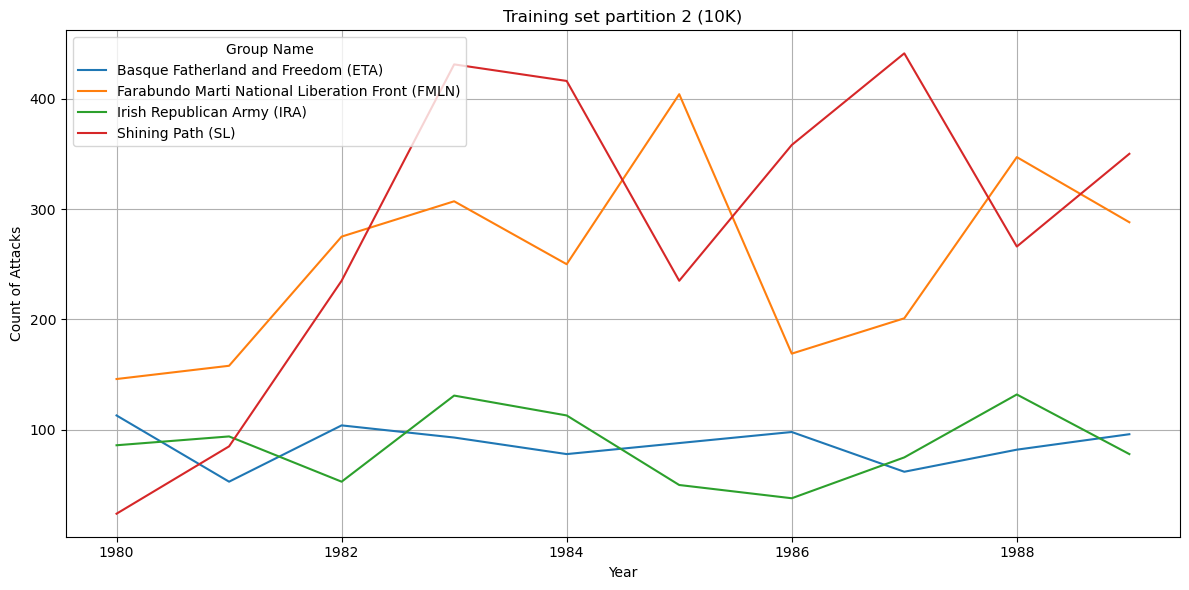

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = train_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Training set partition 2 (10K)')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
total_train = counts(train_df)
print('Total train size: ', total_train)

Shining Path (SL) 2841
Farabundo Marti National Liberation Front (FMLN) 2545
Irish Republican Army (IRA) 850
Basque Fatherland and Freedom (ETA) 867
Total train size:  7103


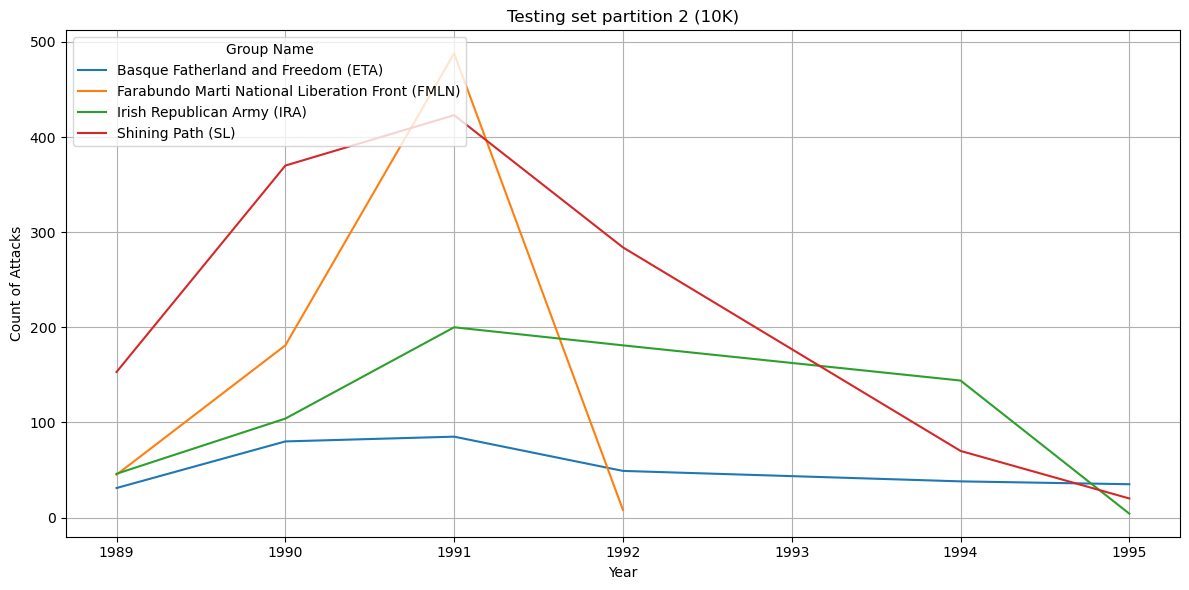

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Group by 'iyear' and 'gname' and count the occurrences
weapon_counts = test_df.groupby(['iyear', 'gname']).size().reset_index(name='count')

# Step 2: Identify the top 10 most active groups
top_groups = weapon_counts.groupby('gname')['count'].sum().nlargest(5).index

# Step 3: Filter the data to include only the top 10 groups
filtered_counts = weapon_counts[weapon_counts['gname'].isin(top_groups)]

# Step 4: Pivot the table with filtered data
pivot_table = filtered_counts.pivot(index='iyear', columns='gname', values='count')

# Step 5: Create a figure for the line chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted for one plot

# Plotting the line chart
pivot_table.plot(kind='line', ax=ax)
ax.set_title('Testing set partition 2 (10K)')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Attacks')
ax.legend(title='Group Name', loc='upper left')
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [29]:
total_test = counts(test_df)
print('Total test size: ', total_test)

Shining Path (SL) 1320
Farabundo Marti National Liberation Front (FMLN) 722
Irish Republican Army (IRA) 679
Basque Fatherland and Freedom (ETA) 318
Total test size:  3039
